MSDS 5701 Final

Problem statement:
Hiring and employee on-boarding are expensive costs to my business. I would greatly benefit if employee retention were increased and attrition decreased. Gaining insights as to what are the common factors that cause employees to leave my company will help me devise strategies to retain talent and reduce employee attrition.

EDA Procedure: 
I Clean my dataset which I've found via Kaggle. The values of the features are primary text-based, so I map normal order values such as low, medium, high to 1, 2, 3. The remaining features that don't have such a relationship I use one-hot encoding to spread out the values and give them boolean assignments. 

I choose Random Forest Classifier, Bagging and Adaptive Boosting because they are all ensemble methods that will give me the best accuracy. I will compare the accuracy and as well as combine bagging and boosting to find the best-fitting model.

Upon completing correlation analysis I will use data visualizations to express the correlation strengths.

In [87]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [216]:
#Create dataframe and map text data to integers
df = pd.read_csv('data.csv')
display(df)

df = df.replace({'Yes':1, 'No':0})
df['Work-Life Balance'] = df['Work-Life Balance'].map({'Excellent':4, 'Good':3, 'Fair':2, 'Poor':1})
df['Job Satisfaction'] = df['Job Satisfaction'].map({'High':4, 'Very High':4, 'Medium':2, 'Low':1})
df['Performance Rating'] = df['Performance Rating'].map({'Average':3, 'High':4, 'Below Average':2, 'Low':1})
df['Company Size'] = df['Company Size'].map({'Large':3, 'Medium':2, 'Small':1})
df['Company Reputation'] = df['Company Reputation'].map({'Poor':1, 'Good':3, 'Fair':2, 'Excellent':4})
df['Employee Recognition'] = df['Employee Recognition'].map({'Medium':2, 'High':3, 'Low':1, 'Very High':4})
df['Attrition'] = df['Attrition'].map({'Stayed':0, 'Left':1})
df['Education Level'] = df['Education Level'].map({'Master’s Degree':4, 'Associate Degree':2, 'High School':1, 'Bachelor’s Degree':3,
 'PhD':5})
#df['Job Level'] = df['Job Level'].map({'Mid':2, 'Entry':1, 'Senior':3})
df = df.drop('Job Level', axis=1)


# New features
# Monthly income percentile by education level
df['Income Percentile by Education'] = df.groupby('Education Level')['Monthly Income'].rank(pct=True) * 100

# Monthly Income Percentile by Job Level
#df['Income Percentile by Job Level'] = df.groupby('Job Level')['Monthly Income'].rank(pct=True) * 100

# Monthly Dollars Earned per Mile Travelled (Distance from Home)
df['Monthly Dollars per Mile'] = df['Monthly Income'] / df['Distance from Home']
# If employee is remote, make $ earned per mile same as total salary, since distance from office likely makes no difference
df.loc[df['Remote Work'] == 1, 'Monthly Dollars per Mile'] = df['Monthly Income']

#One-Hot Encode features where there is no natural order among categories
df = pd.get_dummies(df, columns=['Gender', 'Job Role', 'Marital Status'])
df = df.drop('Employee ID',axis=1)
df = df.dropna()
display(df)

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,Overtime,Distance from Home,Education Level,Marital Status,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,52685,36,Male,13,Healthcare,8029,Excellent,High,Average,1,Yes,83,Master’s Degree,Married,1,Mid,Large,22,No,No,No,Poor,Medium,Stayed
1,30585,35,Male,7,Education,4563,Good,High,Average,1,Yes,55,Associate Degree,Single,4,Entry,Medium,27,No,No,No,Good,High,Left
2,54656,50,Male,7,Education,5583,Fair,High,Average,3,Yes,14,Associate Degree,Divorced,2,Senior,Medium,76,No,No,Yes,Good,Low,Stayed
3,33442,58,Male,44,Media,5525,Fair,Very High,High,0,Yes,43,Master’s Degree,Single,4,Entry,Medium,96,No,No,No,Poor,Low,Left
4,15667,39,Male,24,Education,4604,Good,High,Average,0,Yes,47,Master’s Degree,Married,6,Mid,Large,45,Yes,No,No,Good,High,Stayed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14895,16243,56,Female,42,Healthcare,7830,Poor,Medium,Average,0,Yes,40,Associate Degree,Single,0,Senior,Medium,60,No,No,No,Poor,Medium,Stayed
14896,47175,30,Female,15,Education,3856,Good,Medium,Average,2,Yes,45,Master’s Degree,Married,0,Entry,Medium,20,No,No,No,Good,Medium,Left
14897,12409,52,Male,5,Education,5654,Good,Very High,Below Average,0,No,4,Associate Degree,Married,4,Mid,Small,7,No,No,No,Good,High,Left
14898,9554,18,Male,4,Education,5276,Fair,High,Average,0,No,13,Bachelor’s Degree,Divorced,3,Mid,Large,5,No,No,No,Poor,High,Stayed


,Age,Years at Company,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,Overtime,Distance from Home,Education Level,Number of Dependents,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition,Income Percentile by Education,Monthly Dollars per Mile,Gender_Female,Gender_Male,Job Role_Education,Job Role_Finance,Job Role_Healthcare,Job Role_Media,Job Role_Technology,Marital Status_Divorced,Marital Status_Married,Marital Status_Single
0,36,13,8029,4,4,3,1,1,83,4,1,3,22,0,0,0,1,2,0,61.796068,96.734940,0,1,0,0,1,0,0,0,1,0
1,35,7,4563,3,4,3,1,1,55,2,4,2,27,0,0,0,3,3,1,11.502410,82.963636,0,1,1,0,0,0,0,0,0,1
2,50,7,5583,2,4,3,3,1,14,2,2,2,76,0,0,1,3,1,0,23.567220,398.785714,0,1,1,0,0,0,0,1,0,0
3,58,44,5525,2,4,4,0,1,43,4,4,2,96,0,0,0,1,1,1,24.091969,128.488372,0,1,0,0,0,1,0,0,0,1
4,39,24,4604,3,4,3,0,1,47,4,6,3,45,1,0,0,3,3,0,13.095635,4604.000000,0,1,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14895,56,42,7830,1,2,3,0,1,40,2,0,2,60,0,0,0,1,2,0,57.739689,195.750000,1,0,0,0,1,0,0,0,0,1
14896,30,15,3856,3,2,3,2,1,45,4,0,2,20,0,0,0,3,2,1,4.998334,85.688889,1,0,1,0,0,0,0,0,1,0
14897,52,5,5654,3,4,2,0,0,4,2,4,1,7,0,0,0,3,3,1,24.879486,1413.500000,0,1,1,0,0,0,0,0,1,0
14898,18,4,5276,2,4,3,0,0,13,3,3,3,5,0,0,0,1,3,0,19.422863,405.846154,0,1,1,0,0,0,0,1,0,0


In [217]:
#Split data into target vs features
X = df.drop('Attrition',axis=1)
y = df['Attrition']

#Split data into Training and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Gather data for visualization
results = {}

In [218]:
# Random Forest 
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
feature_importances_rf = pd.DataFrame({'Feature': X.columns, 'Importance': rf.feature_importances_}).sort_values(by='Importance', ascending=False)

# Store results
results['Random Forest'] = {
    'Accuracy': accuracy_score(y_test, y_pred_rf),
    'Confusion Matrix': confusion_matrix(y_test, y_pred_rf),
    'Classification Report': classification_report(y_test, y_pred_rf, output_dict=True)
}
print(results['Random Forest'])
display(feature_importances_rf)

{'Accuracy': 0.6942953020134228, 'Confusion Matrix': array([[1174,  415],
       [ 496,  895]]), 'Classification Report': {'0': {'precision': 0.7029940119760479, 'recall': 0.7388294524858402, 'f1-score': 0.7204664007364222, 'support': 1589}, '1': {'precision': 0.683206106870229, 'recall': 0.6434219985621855, 'f1-score': 0.6627175120325806, 'support': 1391}, 'accuracy': 0.6942953020134228, 'macro avg': {'precision': 0.6931000594231385, 'recall': 0.6911257255240129, 'f1-score': 0.6915919563845014, 'support': 2980}, 'weighted avg': {'precision': 0.693757442847795, 'recall': 0.6942953020134228, 'f1-score': 0.6935104597340586, 'support': 2980}}}


,Feature,Importance
19,Monthly Dollars per Mile,0.096618
8,Distance from Home,0.073019
12,Company Tenure,0.071418
2,Monthly Income,0.069610
18,Income Percentile by Education,0.068347
0,Age,0.065895
1,Years at Company,0.065420
3,Work-Life Balance,0.054416
29,Marital Status_Single,0.050909
9,Education Level,0.038675


In [219]:
# Bagging
bagging_clf = BaggingClassifier(base_estimator=RandomForestClassifier(n_estimators=40, random_state=42), n_estimators=10, random_state=42, n_jobs=-1)
bagging_clf.fit(X_train, y_train)
y_pred_bagging = bagging_clf.predict(X_test)
feature_importances_bagging = pd.DataFrame({
    'Feature': X.columns, 
    'Importance': np.mean([tree.feature_importances_ for tree in bagging_clf.estimators_], axis=0)
}).sort_values(by='Importance', ascending=False)

# Store results
results['Bagging'] = {
    'Accuracy': accuracy_score(y_test, y_pred_bagging),
    'Confusion Matrix': confusion_matrix(y_test, y_pred_bagging),
    'Classification Report': classification_report(y_test, y_pred_bagging, output_dict=True)
}

print(results['Bagging'])
display(feature_importances_bagging)

{'Accuracy': 0.6976510067114094, 'Confusion Matrix': array([[1176,  413],
       [ 488,  903]]), 'Classification Report': {'0': {'precision': 0.7067307692307693, 'recall': 0.7400881057268722, 'f1-score': 0.7230249000922225, 'support': 1589}, '1': {'precision': 0.6861702127659575, 'recall': 0.6491732566498921, 'f1-score': 0.6671592168452161, 'support': 1391}, 'accuracy': 0.6976510067114094, 'macro avg': {'precision': 0.6964504909983633, 'recall': 0.6946306811883822, 'f1-score': 0.6950920584687192, 'support': 2980}, 'weighted avg': {'precision': 0.6971335430419932, 'recall': 0.6976510067114094, 'f1-score': 0.6969479989524286, 'support': 2980}}}


,Feature,Importance
19,Monthly Dollars per Mile,0.099305
8,Distance from Home,0.073525
12,Company Tenure,0.070287
18,Income Percentile by Education,0.069134
2,Monthly Income,0.068710
0,Age,0.066284
1,Years at Company,0.065124
3,Work-Life Balance,0.056060
29,Marital Status_Single,0.053881
10,Number of Dependents,0.038334


In [220]:
# Boosting
boosting_clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1), n_estimators=50, random_state=42)
boosting_clf.fit(X_train, y_train)
y_pred_boosting = boosting_clf.predict(X_test)
feature_importances_boosting = pd.DataFrame({'Feature': X.columns, 'Importance': boosting_clf.feature_importances_}).sort_values(by='Importance', ascending=False)

# Store results
results['Boosting'] = {
    'Accuracy': accuracy_score(y_test, y_pred_boosting),
    'Confusion Matrix': confusion_matrix(y_test, y_pred_boosting),
    'Classification Report': classification_report(y_test, y_pred_boosting, output_dict=True)
}
print(results['Boosting'])
display(feature_importances_boosting)

{'Accuracy': 0.7154362416107383, 'Confusion Matrix': array([[1153,  436],
       [ 412,  979]]), 'Classification Report': {'0': {'precision': 0.736741214057508, 'recall': 0.7256135934550031, 'f1-score': 0.7311350665821179, 'support': 1589}, '1': {'precision': 0.6918727915194346, 'recall': 0.7038102084831057, 'f1-score': 0.6977904490377763, 'support': 1391}, 'accuracy': 0.7154362416107383, 'macro avg': {'precision': 0.7143070027884713, 'recall': 0.7147119009690543, 'f1-score': 0.7144627578099472, 'support': 2980}, 'weighted avg': {'precision': 0.7157975980338637, 'recall': 0.7154362416107383, 'f1-score': 0.7155705152384336, 'support': 2980}}}


,Feature,Importance
19,Monthly Dollars per Mile,0.18
18,Income Percentile by Education,0.12
2,Monthly Income,0.08
3,Work-Life Balance,0.06
12,Company Tenure,0.06
0,Age,0.04
9,Education Level,0.04
16,Company Reputation,0.04
1,Years at Company,0.04
29,Marital Status_Single,0.04


In [221]:
# Bagging + Boosting
bagging_clf_boosting = BaggingClassifier(base_estimator=RandomForestClassifier(n_estimators=40, random_state=42), n_estimators=10, random_state=42, n_jobs=-1)
bagging_clf_boosting.fit(X_train, y_train)
boosting_clf_combined = AdaBoostClassifier(base_estimator=bagging_clf_boosting, n_estimators=10, random_state=42)
boosting_clf_combined.fit(X_train, y_train)
y_pred_combined = boosting_clf_combined.predict(X_test)
# Get feature importances from the first random forest in the bagged model
final_rf_combined = bagging_clf_boosting.estimators_[0]
feature_importances_combined = pd.DataFrame({'Feature': X.columns, 'Importance': final_rf_combined.feature_importances_}).sort_values(by='Importance', ascending=False)
results['Bagging + Boosting'] = {
    'Accuracy': accuracy_score(y_test, y_pred_combined),
    'Confusion Matrix': confusion_matrix(y_test, y_pred_combined),
    'Classification Report': classification_report(y_test, y_pred_combined, output_dict=True)
}
print(results['Bagging + Boosting'])
display(feature_importances_combined)

{'Accuracy': 0.6899328859060403, 'Confusion Matrix': array([[1201,  388],
       [ 536,  855]]), 'Classification Report': {'0': {'precision': 0.6914219919401267, 'recall': 0.7558212712397735, 'f1-score': 0.7221888153938665, 'support': 1589}, '1': {'precision': 0.6878519710378117, 'recall': 0.6146657081236521, 'f1-score': 0.6492027334851935, 'support': 1391}, 'accuracy': 0.6899328859060403, 'macro avg': {'precision': 0.6896369814889691, 'recall': 0.6852434896817128, 'f1-score': 0.68569577443953, 'support': 2980}, 'weighted avg': {'precision': 0.6897555828545159, 'recall': 0.6899328859060403, 'f1-score': 0.6881204798452208, 'support': 2980}}}


,Feature,Importance
19,Monthly Dollars per Mile,0.101514
8,Distance from Home,0.072668
18,Income Percentile by Education,0.069617
2,Monthly Income,0.069342
0,Age,0.067314
12,Company Tenure,0.065898
1,Years at Company,0.063178
3,Work-Life Balance,0.062329
29,Marital Status_Single,0.054772
10,Number of Dependents,0.037497


,Random Forest,Bagging,Boosting,Bagging + Boosting
Accuracy,0.694295,0.697651,0.715436,0.689933
Confusion Matrix,"[[1174, 415], [496, 895]]","[[1176, 413], [488, 903]]","[[1153, 436], [412, 979]]","[[1201, 388], [536, 855]]"
Classification Report,"{'0': {'precision': 0.7029940119760479, 'recal...","{'0': {'precision': 0.7067307692307693, 'recal...","{'0': {'precision': 0.736741214057508, 'recall...","{'0': {'precision': 0.6914219919401267, 'recal..."


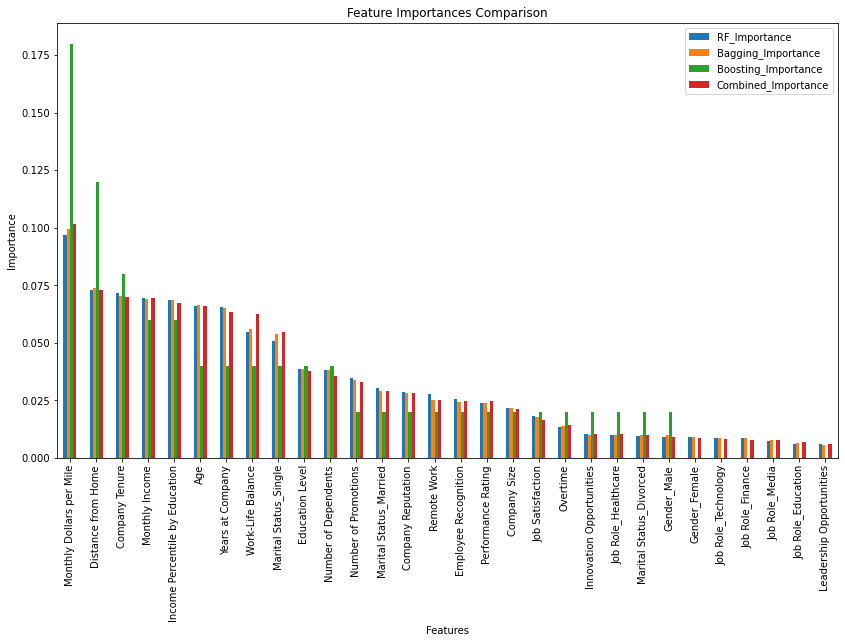

In [222]:
insights = []
insights.append({
    'Model': 'Random Forest',
    'Accuracy': accuracy_score(y_test, y_pred_rf),
    'Confusion Matrix': confusion_matrix(y_test, y_pred_rf),
    'Classification Report': classification_report(y_test, y_pred_rf, output_dict=True)
})

# Bagging
insights.append({
    'Model': 'Bagging',
    'Accuracy': accuracy_score(y_test, y_pred_bagging),
    'Confusion Matrix': confusion_matrix(y_test, y_pred_bagging),
    'Classification Report': classification_report(y_test, y_pred_bagging, output_dict=True)
})

# Boosting
insights.append({
    'Model': 'Boosting',
    'Accuracy': accuracy_score(y_test, y_pred_boosting),
    'Confusion Matrix': confusion_matrix(y_test, y_pred_boosting),
    'Classification Report': classification_report(y_test, y_pred_boosting, output_dict=True)
})

# Bagging + Boosting
insights.append({
    'Model': 'Bagging + Boosting',
    'Accuracy': accuracy_score(y_test, y_pred_combined),
    'Confusion Matrix': confusion_matrix(y_test, y_pred_combined),
    'Classification Report': classification_report(y_test, y_pred_combined, output_dict=True)
})

# Convert the results to a DataFrame
insights_df = pd.DataFrame(results)

# Display the results DataFrame
display(insights_df)

# Consolidate feature importances
feature_importances_all = feature_importances_rf.copy()
feature_importances_all.columns = ['Feature', 'RF_Importance']
feature_importances_all['Bagging_Importance'] = feature_importances_bagging['Importance'].values
feature_importances_all['Boosting_Importance'] = feature_importances_boosting['Importance'].values
feature_importances_all['Combined_Importance'] = feature_importances_combined['Importance'].values

# Plot feature importances for comparison
feature_importances_all.set_index('Feature').plot(kind='bar', figsize=(14, 8))
plt.title('Feature Importances Comparison')
plt.ylabel('Importance')
plt.xlabel('Features')
plt.show()

In [230]:
rf_frame = pd.DataFrame(classification_report(y_test, y_pred_rf, output_dict=True)).transpose()
bagging_frame = pd.DataFrame(classification_report(y_test, y_pred_bagging, output_dict=True)).transpose()
boost_frame = pd.DataFrame(classification_report(y_test, y_pred_boosting, output_dict=True)).transpose()
both_frame = pd.DataFrame(classification_report(y_test, y_pred_combined, output_dict=True)).transpose()
rf_frame['Type'] = 'Random Forest'
bagging_frame['Type'] = "Bagging"
boost_frame['Type'] = 'Boost'
both_frame['Type'] = 'Bag/Boost'
all_frames = pd.concat([rf_frame, bagging_frame, boost_frame, both_frame])
order = ['Type','precision','recall','f1-score','support']
all_frames = all_frames[order]


display(all_frames)


,Type,precision,recall,f1-score,support
0,Random Forest,0.702994,0.738829,0.720466,1589.000000
1,Random Forest,0.683206,0.643422,0.662718,1391.000000
accuracy,Random Forest,0.694295,0.694295,0.694295,0.694295
macro avg,Random Forest,0.693100,0.691126,0.691592,2980.000000
weighted avg,Random Forest,0.693757,0.694295,0.693510,2980.000000
0,Bagging,0.706731,0.740088,0.723025,1589.000000
1,Bagging,0.686170,0.649173,0.667159,1391.000000
accuracy,Bagging,0.697651,0.697651,0.697651,0.697651
macro avg,Bagging,0.696450,0.694631,0.695092,2980.000000
weighted avg,Bagging,0.697134,0.697651,0.696948,2980.000000


In [236]:
rf_frame = pd.DataFrame(classification_report(y_test, y_pred_rf, output_dict=True)).transpose()
bagging_frame = pd.DataFrame(classification_report(y_test, y_pred_bagging, output_dict=True)).transpose()
boost_frame = pd.DataFrame(classification_report(y_test, y_pred_boosting, output_dict=True)).transpose()
both_frame = pd.DataFrame(classification_report(y_test, y_pred_combined, output_dict=True)).transpose()

# Add a column for the model type
rf_frame['Model'] = 'Random Forest'
bagging_frame['Model'] = "Bagging"
boost_frame['Model'] = 'Boosting'
both_frame['Model'] = 'Bagging + Boosting'

# Concatenate all DataFrames into one
all_frames = pd.concat([rf_frame, bagging_frame, boost_frame, both_frame])

# Reset index for better readability
all_frames.reset_index(inplace=True)
all_frames.rename(columns={'index': 'Metric'}, inplace=True)

# Pivot the DataFrame to have models as columns
pivoted_df = all_frames.pivot(index='Metric', columns='Model', values=['precision', 'recall', 'f1-score', 'support'])

# Flatten the multi-level column index
pivoted_df.columns = [f'{stat}_{model}' for stat, model in pivoted_df.columns]

# Display the pivoted DataFrame
display(pivoted_df)

,precision_Bagging,precision_Bagging + Boosting,precision_Boosting,precision_Random Forest,recall_Bagging,recall_Bagging + Boosting,recall_Boosting,recall_Random Forest,f1-score_Bagging,f1-score_Bagging + Boosting,f1-score_Boosting,f1-score_Random Forest,support_Bagging,support_Bagging + Boosting,support_Boosting,support_Random Forest
Metric,,,,,,,,,,,,,,,,
0,0.706731,0.691422,0.736741,0.702994,0.740088,0.755821,0.725614,0.738829,0.723025,0.722189,0.731135,0.720466,1589.000000,1589.000000,1589.000000,1589.000000
1,0.686170,0.687852,0.691873,0.683206,0.649173,0.614666,0.703810,0.643422,0.667159,0.649203,0.697790,0.662718,1391.000000,1391.000000,1391.000000,1391.000000
accuracy,0.697651,0.689933,0.715436,0.694295,0.697651,0.689933,0.715436,0.694295,0.697651,0.689933,0.715436,0.694295,0.697651,0.689933,0.715436,0.694295
macro avg,0.696450,0.689637,0.714307,0.693100,0.694631,0.685243,0.714712,0.691126,0.695092,0.685696,0.714463,0.691592,2980.000000,2980.000000,2980.000000,2980.000000
weighted avg,0.697134,0.689756,0.715798,0.693757,0.697651,0.689933,0.715436,0.694295,0.696948,0.688120,0.715571,0.693510,2980.000000,2980.000000,2980.000000,2980.000000


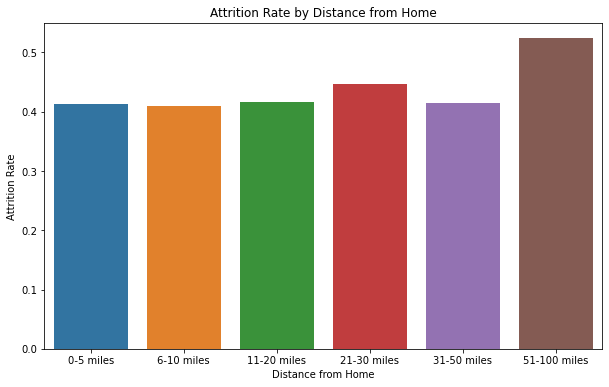

In [174]:
# Define distance segments
bins = [0, 5, 10, 20, 30, 50, 100]
labels = ['0-5 miles', '6-10 miles', '11-20 miles', '21-30 miles', '31-50 miles', '51-100 miles']

# Create a new column for distance ranges
df['Distance Range'] = pd.cut(df['Distance from Home'], bins=bins, labels=labels)

# Calculate attrition rates for each distance range
attrition_rates = df.groupby('Distance Range')['Attrition'].mean().reset_index()

# Plot attrition rates
plt.figure(figsize=(10, 6))
sns.barplot(x='Distance Range', y='Attrition', data=attrition_rates)
plt.title('Attrition Rate by Distance from Home')
plt.xlabel('Distance from Home')
plt.ylabel('Attrition Rate')
plt.show()